# Introduction
This assignment extends the integration function in the previous assignment. This assignment focuses on finding the Fourier Coefficients of functions by two methods:<br/>
1:By Integration<br/>
2:By Least Squares Method<br/>

# Import libraries

In [1]:
import numpy as np
import math
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Definition of functions

In [2]:
def exp(x):
    return np.exp(x)

def coscos(x):
    return np.cos(np.cos(x))

In [3]:
#get f(x) for each x
lower_limit=-2*math.pi
upper_limit=4*math.pi
x=np.linspace(lower_limit,upper_limit,1000)
y_exp=exp(x)
y_coscos=coscos(x)

# Plot of $e^x$  

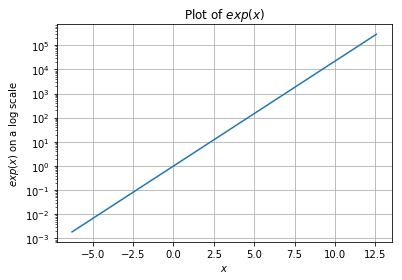

In [4]:
plt.semilogy(x,y_exp,label='exp(x)')
plt.title('Plot of $exp(x)$')
plt.xlabel('$x$')
plt.ylabel('$exp(x)$ on a log scale')
plt.grid()
plt.show()

# Plot of $cos(cos(x))$  
The function $cos(cos(x))$ is periodic with a period equal to $\Pi$.

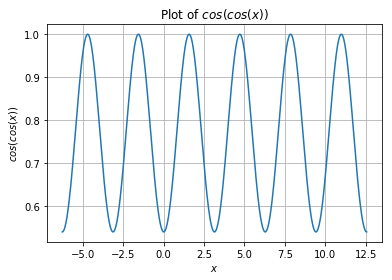

In [5]:
plt.plot(x,y_coscos,label='cos(cos(x))')
plt.title('Plot of $cos(cos(x))$')
plt.xlabel('$x$')
plt.ylabel('$cos(cos(x))$')
plt.grid()
plt.show()

In [6]:
pi=math.pi
cos=False   #make True for cos(cos(x))
lower_limit=0
upper_limit=2*pi

# Definition of a function for getting the $a_0$ coefficient

In [7]:
def a0(function):
    '''
        Returns a0 for the Fourier Series
    '''
    y=quad(function,lower_limit,upper_limit)
    return ((1/(2*pi))*y[0])

# Definition of a function for getting the $a_n$ coefficients

In [8]:
def a_terms(n,function):
    #define f(x)*cos(nx)
    def cos(x,n,function):
        func=function(x)
        return np.cos(n*x)*func
    #pass the above defined function to quad
    integrated=quad(cos,lower_limit,upper_limit,args=(n,function))
    return integrated[0]/pi            

# Definition of a function for getting the $b_n$ coefficients

In [9]:
def b_terms(n,function):
    def sin(x,n,function):
        func=function(x)
        return np.sin(n*x)*func
    #pass the above defined function to quad
    integrated=quad(sin,lower_limit,upper_limit,args=(n,function))
    return integrated[0]/pi            
    

In [10]:
terms_exp=[]#has terms of exp(x)
terms_cos=[]#has terms of cos(cos(x))
terms_exp.append(a0(exp))
terms_cos.append(a0(coscos))


# Getting the vector containing the coefficients
The array `terms_exp` has the fourier coeffiecients for the function $e^x$.<br/>
And the array `terms_cos` has the fourier coefficients for the function $cos(cos(x))$

In [11]:
for i in range(1,26):
    function=exp
    terms_exp.append(a_terms(i,function))
    terms_exp.append(b_terms(i,function))
    function=coscos
    terms_cos.append(a_terms(i,function))
    terms_cos.append(b_terms(i,function))
    


# Create an array for n

In [12]:
n=[]
n.append(0)
for i in range(1,26):
    n.append(i)
    n.append(i)

# Semilog plot of the coefficients of $cos(cos(x))$
The significant coefficients are almost linear in the semilog plot.There are many coefficients which tend to zero as $cos(cos(x))$ is a periodic function.Thus it has a particular frequency dominating over others.The $b_n$ terms are almost zero because it is an even function.

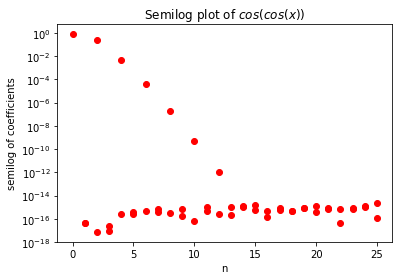

In [13]:
plt.semilogy(n,np.abs(terms_cos),'ro')
plt.title('Semilog plot of $cos(cos(x))$')
plt.xlabel('n')
plt.ylabel('semilog of coefficients')
plt.show()

# Loglog plot of the coefficients of $cos(cos(x))$

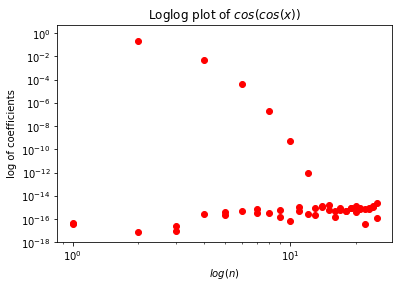

In [14]:
plt.loglog(n,np.abs(terms_cos),'ro')
plt.title('Loglog plot of $cos(cos(x))$')
plt.xlabel('$log(n)$')
plt.ylabel('log of coefficients')
plt.show()

# Semilog plot of the coefficients of $e^x$
The coefficients decay exponentially as the value of n increases.

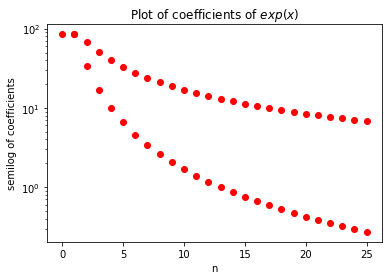

In [15]:
plt.semilogy(n,np.abs(terms_exp),'ro')
plt.title('Plot of coefficients of $exp(x)$')
plt.xlabel('n')
plt.ylabel('semilog of coefficients')
plt.show()

# Loglog plot of the coefficients of $e^x$
The plot is linear because the terms deacyy exponentially

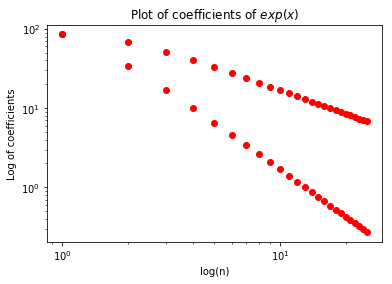

In [16]:
plt.loglog(n,np.abs(terms_exp),'ro')
plt.title('Plot of coefficients of $exp(x)$')
plt.xlabel('log(n)')
plt.ylabel('Log of coefficients')
plt.show()

# Least Squares Method
The coefficients can also be obtained by this method.This method basically fits the variables in a set of equations where the error which is squared is minimized.<br/>
## Derivation of Least Squares Method using linear algebra:
We want to find the solution for Ax=b<br/>
But due to more number of equations than the number of variables we may not get a perfect solution and hence we find a solution $x$ which minimizes the error $\epsilon$=$b-Ax$.<br/>


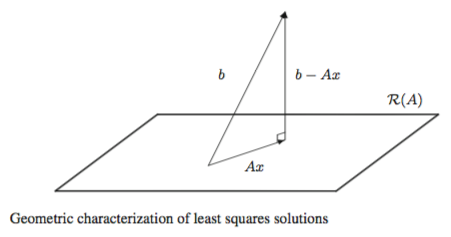

In [17]:
from IPython.display import Image
Image(filename='/Users/siddharthnayak/Desktop/least_square.png')

In the figure above $b-Ax$ is minimum when it is perpendicular to $Ax$.<br/>
Thus,<br/>
$A^T.(b-Ax)=0$ $\longrightarrow$ $A$ is perpendicular to $b-Ax$<br/>
$A^T.b=(A^T.A).x$<br/>
$\therefore x=(A^T.A)^{-1}.A^T.b$


In [18]:
#least squares method for exp(x)
x=np.linspace(0,2*pi,401)
x=x[:-1] # drop last term to have a proper periodic integral b=f(x) # f has been written to take a vector 
b=np.exp(x)
A_exp=np.zeros((400,51)) # allocate space for A
A_exp[:,0]=1 #col1isallones
for k in range(1,26):
        A_exp[:,2*k-1]=np.cos(k*x) # cos(kx) column
        A_exp[:,2*k]=np.sin(k*x)   # sin(kx) column
      #endfor
cl_exp=np.linalg.lstsq(A_exp,b)[0]      # the ’[0]’ is to pull out the
      # best fit vector. lstsq returns a list.

In [19]:
#least squares method for cos(cos(x))
x=np.linspace(0,2*pi,401)
x=x[:-1] # drop last term to have a proper periodic integral b=f(x) # f has been written to take a vector 
b=np.cos(np.cos(x))
A_cos=np.zeros((400,51)) # allocate space for A
A_cos[:,0]=1 #col1isallones
for k in range(1,26):
        A_cos[:,2*k-1]=np.cos(k*x) # cos(kx) column
        A_cos[:,2*k]=np.sin(k*x)   # sin(kx) column
      #endfor
cl_cos=np.linalg.lstsq(A_cos,b)[0]      # the ’[0]’ is to pull out the
      # best fit vector. lstsq returns a list.

# Plot of coefficients compared with that obtained from least squares method for $e^x$
The coefficients match initially but later they do not match and deviate.The error is almost one order of magnitude at one stage.

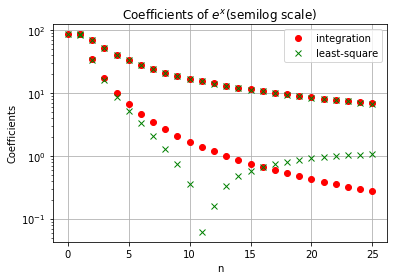

In [20]:
plt.semilogy(n,np.abs(terms_exp),'ro',label='integration')
plt.semilogy(n,np.abs(cl_exp),'gx',label='least-square')
plt.title('Coefficients of $e^x$(semilog scale)')
plt.xlabel('n')
plt.ylabel('Coefficients')
plt.legend()
plt.grid()
plt.show()

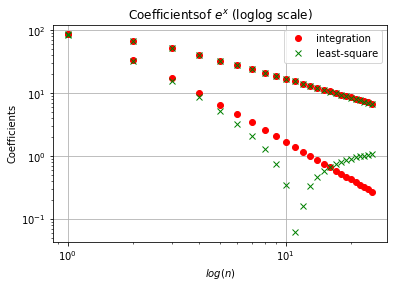

In [21]:
plt.loglog(n,np.abs(terms_exp),'ro',label='integration')
plt.loglog(n,np.abs(cl_exp),'gx',label='least-square')
plt.title('Coefficientsof $e^x$ (loglog scale)')
plt.xlabel('$log(n)$')
plt.ylabel('Coefficients')
plt.legend()
plt.grid()
plt.show()

# Plot of coefficients compared with that obtained from least squares method for $cos(cos(x))$
The coefficients match and the error is almost negligble for many terms.The error is of the order $10^{-16}$ for many of the terms.

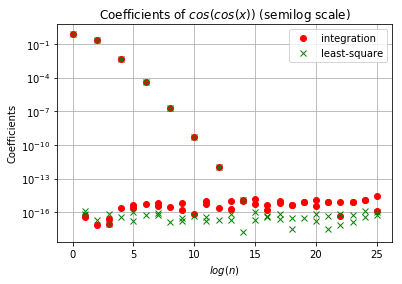

In [22]:
plt.semilogy(n,np.abs(terms_cos),'ro',label='integration')
plt.semilogy(n,np.abs(cl_cos),'gx',label='least-square')
plt.title('Coefficients of $cos(cos(x))$ (semilog scale)')
plt.xlabel('$log(n)$')
plt.ylabel('Coefficients')
plt.legend()
plt.grid()
plt.show()

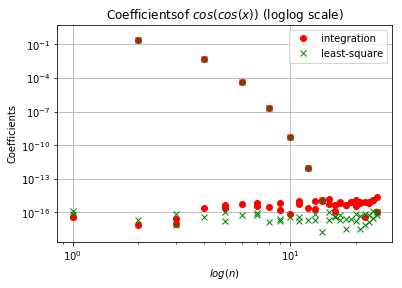

In [23]:
plt.loglog(n,np.abs(terms_cos),'ro',label='integration')
plt.loglog(n,np.abs(cl_cos),'gx',label='least-square')
plt.title('Coefficientsof $cos(cos(x))$ (loglog scale)')
plt.xlabel('$log(n)$')
plt.ylabel('Coefficients')           
plt.legend()
plt.grid()
plt.show()

# Error in the coefficients obtained by least squares method

In [24]:
error_exp_terms=np.abs(cl_exp-terms_exp)
error_cos_terms=np.abs(cl_cos-terms_cos)

# Plot of error vs n for $e^x$
The maximum error in the coefficients is 1.33273087034.

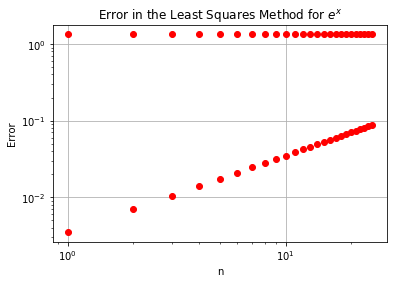

1.33273087034


In [25]:
plt.loglog(n,error_exp_terms,'ro')
plt.title('Error in the Least Squares Method for $e^x$')
plt.xlabel('n')
plt.ylabel('Error')
plt.grid()
plt.show()
print(np.max(error_exp_terms))

# Plot of error vs n for $cos(cos(x))$
The maximum error in the coefficients is 2.68497473562e-15.

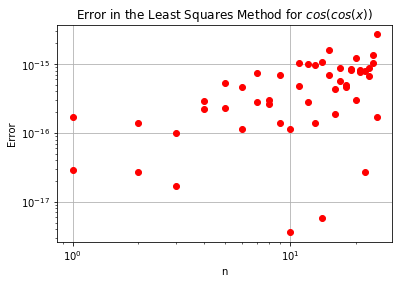

2.68497473562e-15


In [26]:
plt.loglog(n,error_cos_terms,'ro')
plt.title('Error in the Least Squares Method for $cos(cos(x))$')
plt.xlabel('n')
plt.ylabel('Error')
plt.grid()
plt.show()
print(np.max(error_cos_terms))

# Reconstruction of the original signal from the fourier coefficients

In [27]:
c_exp=terms_exp
c_cos=terms_cos
b_exp=np.dot(A_exp,c_exp)
b_cos=np.dot(A_cos,c_cos)


# Plot of the signal reconstructed for $e^x$
The original signal $e^x$ is not reconstructed properly and has some distortions.The convergence can be made better by increasing the number of fourier coefficients.

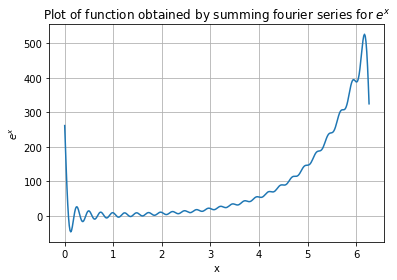

In [28]:
plt.plot(x,b_exp)
plt.title('Plot of function obtained by summing fourier series for $e^x$')
plt.xlabel('x')
plt.ylabel('$e^x$')
plt.grid()
plt.show()

# Plot of the signal reconstructed for $cos(cos(x))$
The origninal sequence is reconstructed properly because the higher terms in the fourier series are negligible hence they can be neglected. Hence we get the signal even after summing only 26 terms.

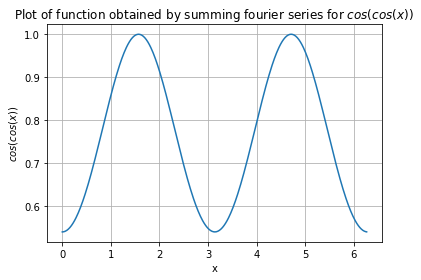

In [29]:
plt.plot(x,b_cos)
plt.title('Plot of function obtained by summing fourier series for $cos(cos(x))$')
plt.xlabel('x')
plt.ylabel('$cos(cos(x))$')
plt.grid()
plt.show()

# Conclusion
1:The signal can be recreated properly for a periodic signal by summing the Fourier Coefficients.<br/>
2:The least squares method is a good approximator in some cases.<br/>
3:The least squares method is computationally faster as it is vectorized.